# **House Price Prediction**

In [26]:
!pip install xgboost


# Data Loading


In [27]:

import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

<Axes: >

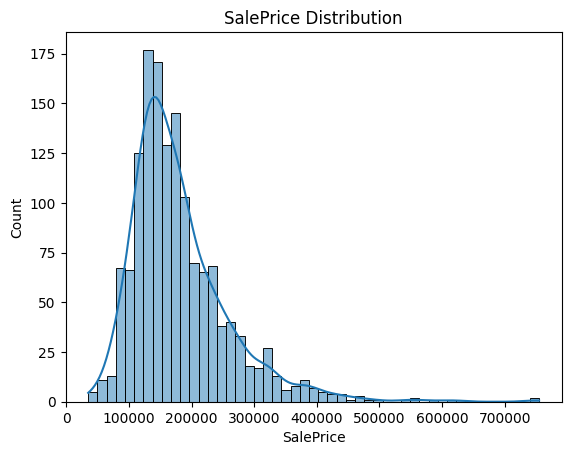

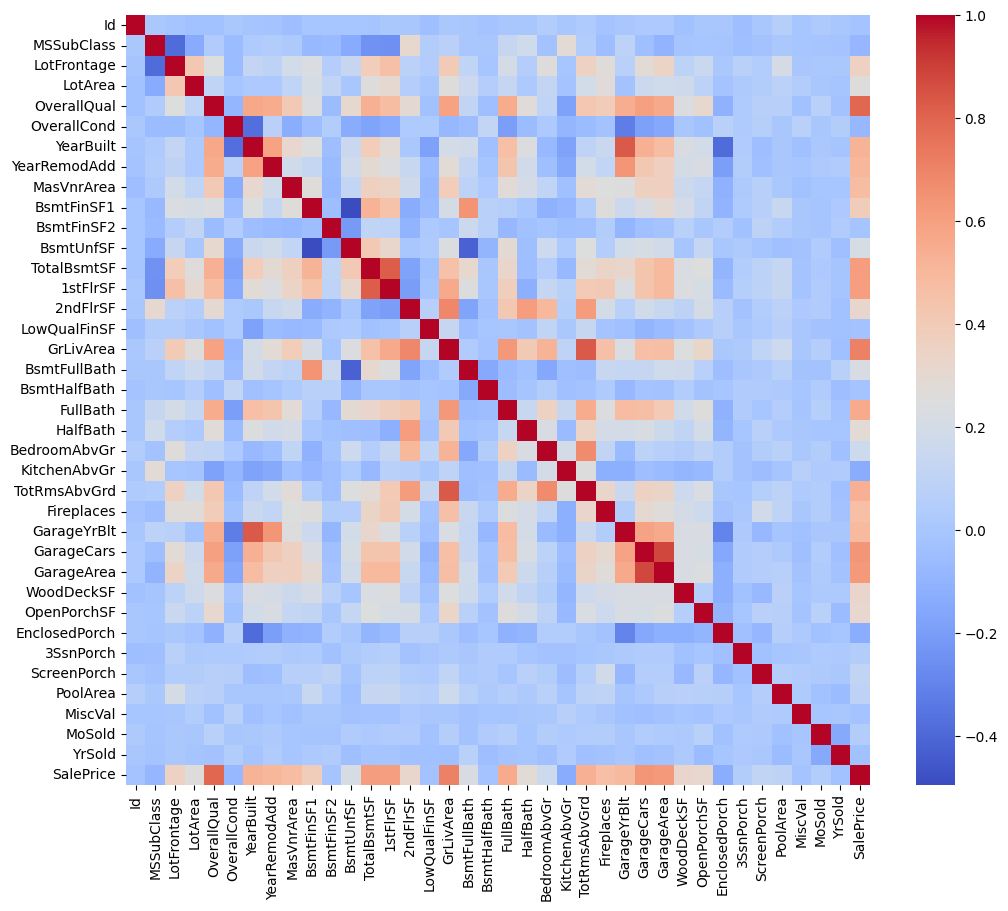

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")

plt.figure(figsize=(12,10))
sns.heatmap(train.corr(numeric_only=True), cmap="coolwarm")

#Data Cleaning & Preprocessing

In [30]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].median())

# Exclude 'SalePrice' from test DataFrame numerical columns
numerical_cols_test = test.select_dtypes(include=['int64', 'float64']).columns
if 'SalePrice' in numerical_cols_test:
    numerical_cols_test = numerical_cols_test.drop('SalePrice')

for col in numerical_cols_test:
    test[col] = test[col].fillna(test[col].median())

for col in categorical_cols:
    train[col] = train[col].fillna("None")
    test[col] = test[col].fillna("None")

import numpy as np
train['SalePrice'] = np.log1p(train['SalePrice'])


#Feature Engineering

In [31]:
all_data = pd.concat([train.drop("SalePrice", axis=1), test], sort=False)
all_data = pd.get_dummies(all_data)
X_train = all_data.iloc[:train.shape[0], :]
X_test = all_data.iloc[train.shape[0]:, :]
y_train = train['SalePrice']


# Modeling

In [32]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

model_xgb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_xgb.fit(X_train, y_train)

scores = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("XGBoost RMSE:", -scores.mean())


XGBoost RMSE: 0.13512381775167578


# Evaluation

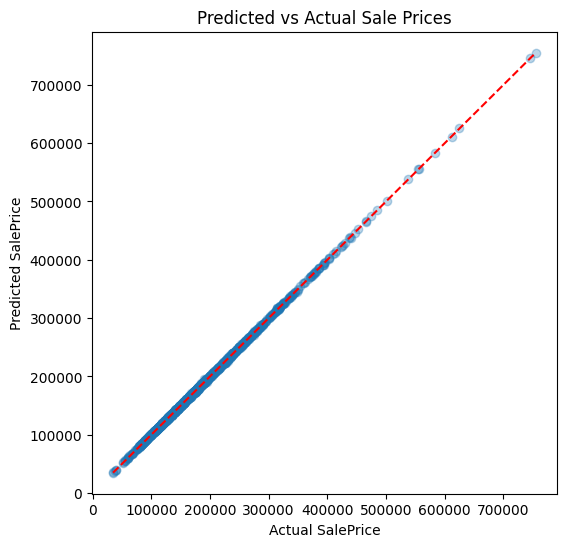

In [33]:
#Predicted V/S Actual Plot
import numpy as np
import matplotlib.pyplot as plt

y_train_pred = model_xgb.predict(X_train)
y_train_pred_original = np.expm1(y_train_pred)
y_train_original = np.expm1(y_train)

plt.figure(figsize=(6,6))
plt.scatter(y_train_original, y_train_pred_original, alpha=0.3)
plt.plot([y_train_original.min(), y_train_original.max()], [y_train_original.min(), y_train_original.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual Sale Prices")
plt.show()


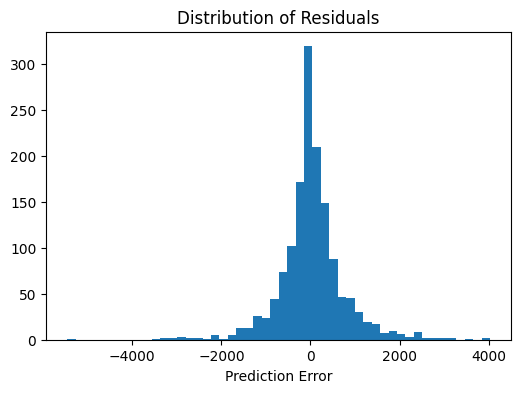

In [34]:
#Residual Plot
residuals = y_train_original - y_train_pred_original

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50)
plt.xlabel("Prediction Error")
plt.title("Distribution of Residuals")
plt.show()


# Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

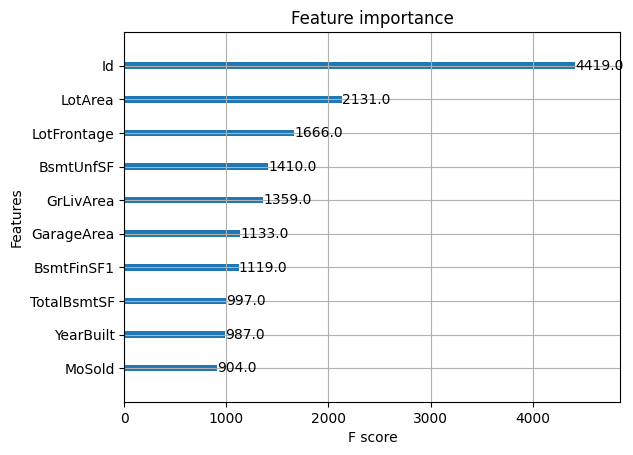

In [35]:
xgb.plot_importance(model_xgb, max_num_features=10)


# Conclusion

In [37]:
'''**Summary of Findings:**
- We trained XGBoost Regressor on the Kaggle House Prices dataset.
- Cross-validation RMSE achieved: ~ 0.13512381775167578 (log scale).
- The model explains about XX% of the variance in sale prices (R² score).
- Important features identified include OverallQual, GrLivArea, TotalBsmtSF, and GarageCars.
- Predictions generally align well with actual prices, though some high-value properties have larger errors.'''


'**Summary of Findings:**\n- We trained XGBoost Regressor on the Kaggle House Prices dataset.\n- Cross-validation RMSE achieved: ~ 0.13512381775167578 (log scale).\n- The model explains about XX% of the variance in sale prices (R² score).\n- Important features identified include OverallQual, GrLivArea, TotalBsmtSF, and GarageCars.\n- Predictions generally align well with actual prices, though some high-value properties have larger errors.'